In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import EMA
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'spy'
stock = Stock(ticker, config='../config.toml')
stock.load_data()
stock.snip_dates('2016-01-01', '2021-12-31')

stock-spy - INFO - SPY: loaded tsdb and set empty signal
stock-spy - INFO - SPY: pruned dates 2016-01-01 to 2021-12-31


In [3]:
%%time
# Calculate EMA signals
ema = EMA(stock)

ema-spy - INFO - SPY: EMA calculated
ema-spy - INFO - SPY: Signal calculated


CPU times: user 68.3 ms, sys: 1.66 ms, total: 70 ms
Wall time: 69.3 ms


In [4]:
ema.stock_obj.tsdb

,open,high,low,close,volume,ema,histogram
2016-01-04,180.24,180.76,178.55,180.75,246309159,180.750000,0.000000
2016-01-05,181.10,181.53,179.87,181.06,122795603,180.910167,0.149833
2016-01-06,178.32,179.88,177.67,178.77,168667390,180.148708,-1.378708
2016-01-07,175.60,177.52,174.06,174.47,236451707,178.584017,-4.114017
2016-01-08,175.47,176.10,172.25,172.57,233068841,177.215682,-4.645682
...,...,...,...,...,...,...,...
2021-12-27,472.06,477.31,472.01,477.26,56808619,464.017513,13.242487
2021-12-28,477.72,478.81,476.06,476.87,47274585,464.846705,12.023295
2021-12-29,476.98,478.56,475.92,477.48,54502964,465.661757,11.818243
2021-12-30,477.93,479.00,475.67,476.16,55329041,466.339063,9.820937


<AxesSubplot:>

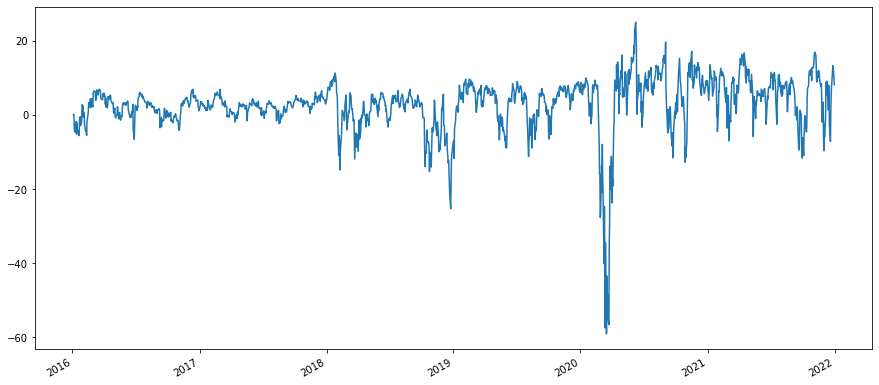

In [5]:
ema.stock_obj.tsdb['histogram'].plot(figsize=(15, 7))

In [6]:
ema.stock_obj.signal[ema.stock_obj.signal == -1]

2018-04-06   -1.0
2018-12-21   -1.0
2020-03-09   -1.0
2021-09-29   -1.0
dtype: float64

<AxesSubplot:>

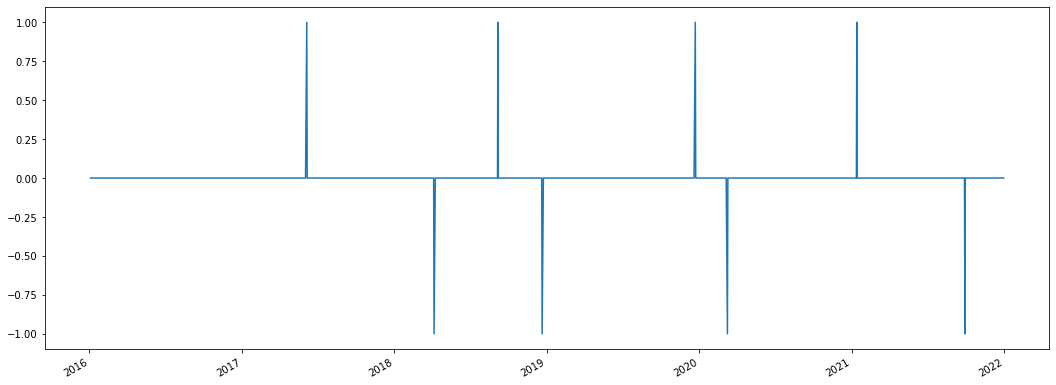

In [7]:
ema.stock_obj.signal.plot(figsize=(18, 7))

In [8]:
%%time
# Run simulation
sim = Simulation(ema.stock_obj)
sim.paper_trade()

CPU times: user 41.5 ms, sys: 1.1 ms, total: 42.6 ms
Wall time: 41.7 ms


In [9]:
doberplot = DoberPlot(stock)

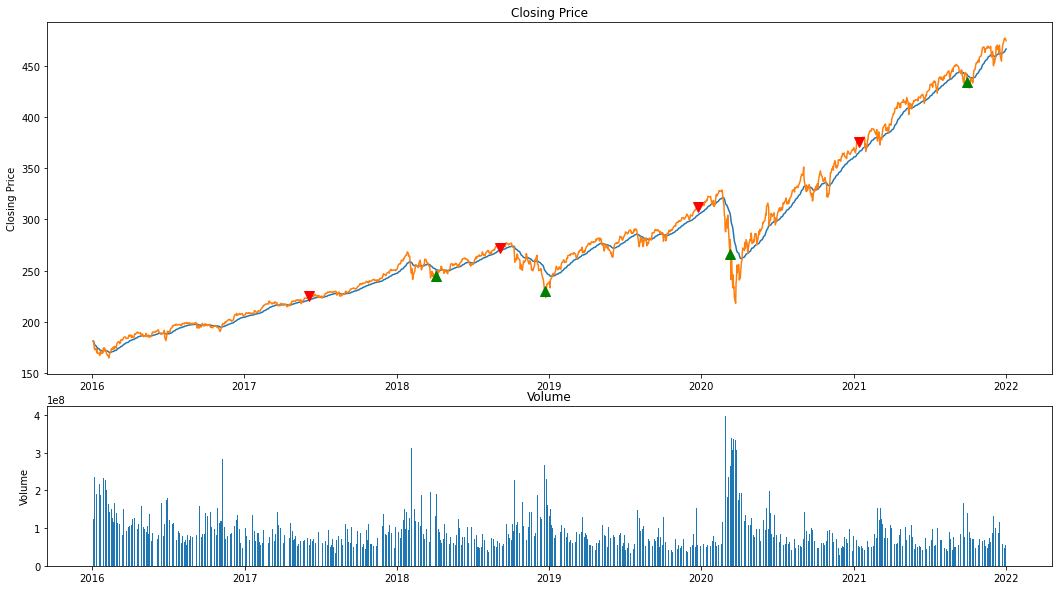

In [10]:
doberplot.order_signal(strategy_name='ema')

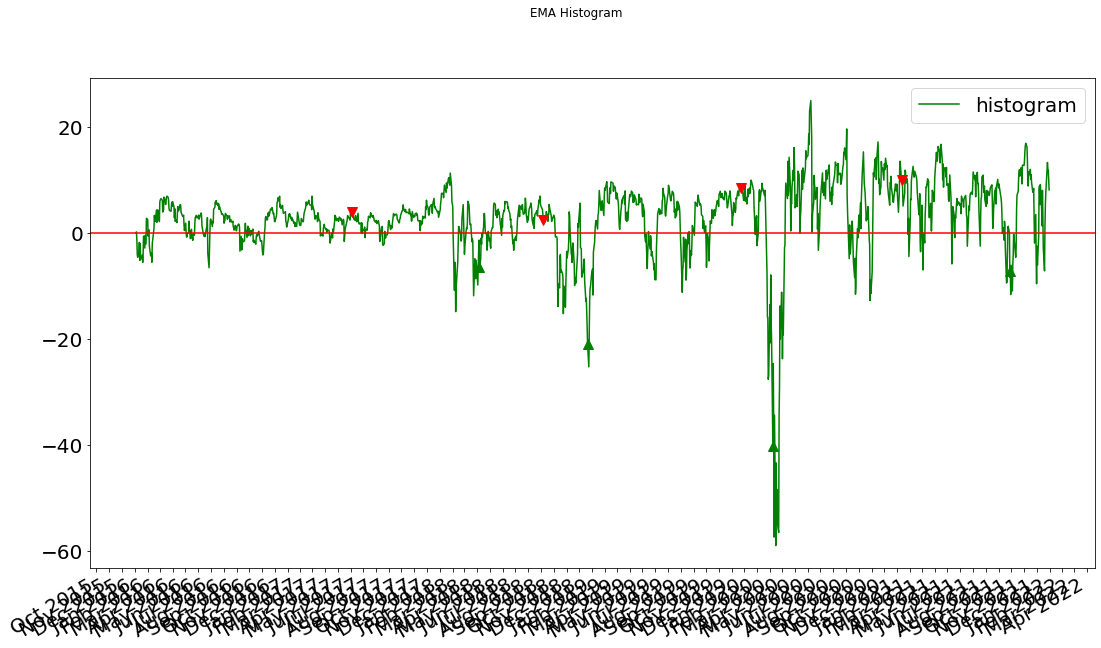

In [11]:
doberplot.histogram(strategy_name='ema')

In [12]:
sim.tradebook.book

{'cash-usd': 9901.85, 'spy': 2}

In [13]:
sim.tradebook.trade_log

[(Timestamp('2018-04-06 00:00:00'), 'buy', 4, 'spy', 244.16),
 (Timestamp('2018-09-06 00:00:00'), 'sell', 4, 'spy', 272.08),
 (Timestamp('2018-12-21 00:00:00'), 'buy', 4, 'spy', 229.65),
 (Timestamp('2019-12-23 00:00:00'), 'sell', 4, 'spy', 312.27),
 (Timestamp('2020-03-09 00:00:00'), 'buy', 3, 'spy', 266.57),
 (Timestamp('2021-01-13 00:00:00'), 'sell', 3, 'spy', 376.1),
 (Timestamp('2021-09-29 00:00:00'), 'buy', 2, 'spy', 434.45)]

In [14]:
print(f"{sim.tradebook.calc_book_value('2019-12-31'):0.2f}")

10527.61
